# Lösungen

Der folgende Code repliziert die drei Simulationen in [Kalick/Hamilton (1986): The Matching Hypothesis Reexamined. Journal of Personality and Social Psychology, Vol 51(4), p. 673-682](https://doi.apa.org/buy/1987-04005-001).

## Definition der Agenten-Klasse

In [1]:
class Agent:
    """
    Implementierung der Agenten der Simulation in "The Matching Hypothesis Reexamined" (Kalick/Hamilton 1986).
    Eigenschaften der Agenten sind Attraktivität, Anzahl der bisherigen Dates, Beziehungsstatus sowie Geschlecht.
    Agenten können zudem die Präferenz für einen anderen, gedateten Agenten berechnen und sich mit einer gewissen 
    Wahrscheinlichkeit dafür entscheiden, mit ihrem Date ein Paar zu werden.
    Die Auswahl der Dates erfolgt zufällig und außerhalb der Agenten-Klasse innerhalb der Simulation.
    """
    def __init__(self, attractiveness, gender):
        self.attractiveness = attractiveness # Attraktivität des Agenten auf Skala von 1 bis 10
        self.gender = gender # Geschlecht
        self.date_number = 0 # Anzahl absolvierter Dates
        self.is_single = True # Single-Status
        
    def get_P1(self, potential_partner):
        """
        Berechnet die (unkorrigierte) Dateaktzeptierungswahrscheinlichkeit 
        von Simulation 1 aus Kalick/Hamilton (1986, S. 677).
        """
        return pow(potential_partner.attractiveness, 3) / 1000
    
    def get_P2(self, potential_partner):
        """
        Berechnet die (unkorrigierte) Dateaktzeptierungswahrscheinlichkeit 
        von Simulation 2 aus Kalick/Hamilton (1986, S. 678).
        """
        return pow(10 - abs(self.attractiveness - potential_partner.attractiveness), 3) / 1000
    
    def get_P3(self, potential_partner):
        """
        Berechnet die (unkorrigierte) Dateaktzeptierungswahrscheinlichkeit 
        von Simulation 3 aus Kalick/Hamilton (1986, S. 678).
        """
        return (self.get_P1(potential_partner) + self.get_P2(potential_partner)) / 2
    
    def correct_for_date_number(self, p):
        """
        Korriegiert die eingegebene Dateaktzeptierungswahrscheinlichkeit
        nach der Anzahl unerfolgreicher Dates und erhöht zugleich die Anzahl der
        absolvierten Dates um 1 pro Aufruf. Je mehr unerfolgreiche Dates absolviert wurden,
        desto höher die Dateaktzeptierungswahrscheinlichkeit.
        Korrektur wird in allen drei Simulationen in Kalick/Hamilton (1986) verwendet.
        """
        self.date_number += 1
        return pow(p, (51 - self.date_number) / 50)
    
    
    def eval_date(self, potential_partner, mechanism):
        """
        Entscheidet in Abhängigkeit von ausgewähltem Bewertungsmechanismus und entsprechender Dateakzeptierungswahrscheinlichkeit,
        ob man sich mit dem gedateten Agenten verpartnern würde.
        """
        # Je nach ausgewähltem Mechanismus die Akzeptierungswahrscheinlichkeit P entsprechend berechnen
        if mechanism == 1:
            p = self.get_P1(potential_partner)
        elif mechanism == 2:
            p = self.get_P2(potential_partner)
        elif mechanism == 3:
            p = self.get_P3(potential_partner)
        
        # Dateakzeptierungswahrscheinlichkeit P für die Anzahl der absolvierten Dates korrigieren
        pc = self.correct_for_date_number(p)
        
        # Entscheiden, ob man Interesse am gedateten Agenten hat
        if random.random() <= pc:
            decision = True
        else:
            decision = False
            
        # Alternative Kurzschreibweise des If-Else-Statements
        # decision = (True if random.random() <= pc else False)
        
        # Entscheidung ausgeben
        return decision

## Definition der Simulations-Funktion

In [2]:
import random
import numpy as np
import pandas as pd

def simulation(
    mechanism, # Integer von 1 bis 3, welcher angibt, welcher Präferenzmechanismus ausgeführt wird
    agents_per_gender = 1000,
    max_dating_rounds = 51,
):
    
    #### INITIALISIERUNG ####   
    
    # Populationen erstellen
    population = []
    for i in range(agents_per_gender):
        
        # Frau erstellen und an Population anhängen
        woman = Agent(attractiveness=random.randint(1,10), gender="w")
        population.append(woman)

        # Mann erstellen und an Population anhängen
        man = Agent(attractiveness=random.randint(1,10), gender="m")
        population.append(man)
    
    # Alternative Kurzschreibweise per list comprehension
    # population = [Agent(attractiveness=random.randint(1,10), gender="w") for i in range(agents_per_gender)]
    # population.extend([Agent(attractiveness=random.randint(1,10), gender="m") for i in range(agents_per_gender)])
    
    # Listen, in denen später die Attraktivität der erfolgreich verpartnerten Agenten gespeichert wird
    # Auf Basis dieser Listen wird z.B. Korrelation zwischen Attraktivität innerhalb von Paaren berechnet
    attractiveness_of_coupled_men = []
    attractiveness_of_coupled_women = []
    
    # Dictionary, in welchem die relevanten Output-Daten als Datenreihen gespeichert werden. Wird am Ende in Dataframe umgewandelt und ausgegeben.
    data_dict = {
        "dating_round": [],
        "percent_coupled": [],
        "average_attractiveness_of_couples": [],
        "intra_couple_correlation_of_attractiveness": [],
    }
    
    
    #### SIMULATIONSLOOP ####
    
    # für jede Dating-Runde
    for dating_round in range(max_dating_rounds):
        
        # Single-Männer und Single-Frauen heraussuchen und jeweils in Liste speichern
        single_women = []
        single_men = []
        for agent in population:
            if agent.is_single:
                if agent.gender == "w":
                    single_women.append(agent)
                else:
                    single_men.append(agent)
        
        # Alternative Kurzschreibweise mit list comprehension
        # single_women = [agent for agent in population if agent.is_single and agent.gender == "w"]
        # single_men = [agent for agent in population if agent.is_single and agent.gender == "m"]
        
        # Single-Listen mischen
        random.shuffle(single_men)
        random.shuffle(single_women)

        # Positionen der Single-Liste der Männer (und Frauen) durchgehen
        # (Single-Liste der Männer und Frauen ist jeweils gleich lang)
        for i in range(len(single_men)):
            
            # jeweils Mann und Frau auf derselben Position innerhalb ihrer Single-Listen auswählen, um diese auf Date zu schicken
            man = single_men[i]
            woman = single_women[i]
            
            # Beide entscheiden lassen
            decision_of_man = man.eval_date(potential_partner=woman, mechanism=mechanism)
            decision_of_woman = woman.eval_date(potential_partner=man, mechanism=mechanism)

            # Wenn beide Agenten sich füreinander entscheiden
            if decision_of_man and decision_of_woman:
                
                # Single-Status auf False setzen, da jetzt "vergeben"
                man.is_single = False
                woman.is_single = False

                # Attraktivität von Mann und Frau jeweils in entsprechender Liste abspeichern
                attractiveness_of_coupled_men.append(man.attractiveness)
                attractiveness_of_coupled_women.append(woman.attractiveness)
    
            
        # Wenn mindestens 2 Paare vorhanden sind
        if len(attractiveness_of_coupled_men) >= 2:

            # Korrelation zwischen der Attraktivität der Männer und der Frauen in Couples berechnen und an Datenreihe anhängen
            correlation = np.corrcoef(attractiveness_of_coupled_men, attractiveness_of_coupled_women)[0][1]
            data_dict["intra_couple_correlation_of_attractiveness"].append(correlation)

            # Durchschnittliche Attraktivität der vercoupleten Agenten berechnen und an Datenreihe anhängen
            average = (sum(attractiveness_of_coupled_men) + sum(attractiveness_of_coupled_women)) / (len(attractiveness_of_coupled_men) + len(attractiveness_of_coupled_men))
            data_dict["average_attractiveness_of_couples"].append(average)

            # Ausrechnen, wie viel Prozent der Agenten gerade vergeben sind und an entsprechende Liste hängen
            percent = (len(attractiveness_of_coupled_men) / agents_per_gender) * 100
            data_dict["percent_coupled"].append(percent)
            
            # Aktuelle Dating-Runde speichern
            data_dict["dating_round"].append(dating_round)
    
    # Dictionary in Dataframe umwandeln
    df = pd.DataFrame(data_dict)
    
    # Eine Spalte einfügen, welche den ausgewählten Mechanismus benennt
    df["mechanism"] = mechanism
    
    # Dataframe ausgeben
    return df

## Simulationen ausführen

In [3]:
# für jeden Präferenz-Mechanismus eine Simulation laufen lassen und Dataframes abspeichern 

# Anzahl von Agenten pro Geschlecht
AGENTS_PER_GENDER = 10000

# Simulation 1
df1 = simulation(mechanism=1, agents_per_gender=AGENTS_PER_GENDER)

# Simulation 2
df2 = simulation(mechanism=2, agents_per_gender=AGENTS_PER_GENDER)

# Simulation 3
df3 = simulation(mechanism=3, agents_per_gender=AGENTS_PER_GENDER)

# Aus den drei Dataframes für jede Simulation einen großen Dataframe machen
df = pd.concat([df1, df2, df3])

# optional: Neue Spalte mit informativeren Namen für jeweiligen Mechanismus erstellen & umkodieren
df["mechanism_label"] = df["mechanism"]
df.loc[df["mechanism_label"] == 1, "mechanism_label"] = "high attractiveness"
df.loc[df["mechanism_label"] == 2, "mechanism_label"] = "matching"
df.loc[df["mechanism_label"] == 3, "mechanism_label"] = "high attractiveness + matching"

In [4]:
df.head()

,dating_round,percent_coupled,average_attractiveness_of_couples,intra_couple_correlation_of_attractiveness,mechanism,mechanism_label
0,0,9.36,8.353098,0.025082,1,high attractiveness
1,1,15.85,8.268770,0.028049,1,high attractiveness
2,2,20.97,8.179781,0.026704,1,high attractiveness
3,3,25.08,8.121013,0.030752,1,high attractiveness
4,4,28.57,8.056353,0.033066,1,high attractiveness


In [5]:
df.tail()

,dating_round,percent_coupled,average_attractiveness_of_couples,intra_couple_correlation_of_attractiveness,mechanism,mechanism_label
46,46,100.0,5.50905,0.740919,3,high attractiveness + matching
47,47,100.0,5.50905,0.740919,3,high attractiveness + matching
48,48,100.0,5.50905,0.740919,3,high attractiveness + matching
49,49,100.0,5.50905,0.740919,3,high attractiveness + matching
50,50,100.0,5.50905,0.740919,3,high attractiveness + matching


## Ergebnisse darstellen

Statt wie im Original-Artikel für jede Simulation ein Diagramm mit jeweils zwei Linien zu erstellen, erstelle ich im Folgenden zwei Diagramme, welche jeweils die Ergebnisse von allen Simulationen enthalten. Das erste Diagramm enthält die Höhe der Korrelation der Attraktivität innerhalb der Paare im Verlauf der Simulation. Das zweite Diagramm enthält die durchschnittliche Attraktivität der bereits vergebenen Agenten im Verlauf der Simulation.

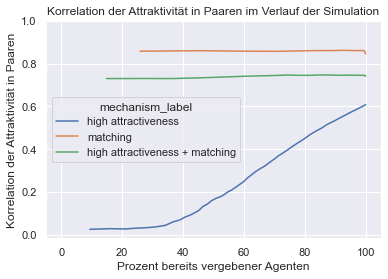

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Farbschema einstellen
sns.set_theme()

# Diagramm erstellen - Linien werden gruppiert nach "mechanism_label"
sns.lineplot(data=df, x="percent_coupled", y="intra_couple_correlation_of_attractiveness", hue="mechanism_label")

# Diagramm beschriften
plt.title("Korrelation der Attraktivität in Paaren im Verlauf der Simulation")
plt.xlabel("Prozent bereits vergebener Agenten")
plt.ylabel("Korrelation der Attraktivität in Paaren")

# Sichtbare Achsenbereiche einstellen
plt.xlim([-5, 105])
plt.ylim([None, 1])

plt.show()

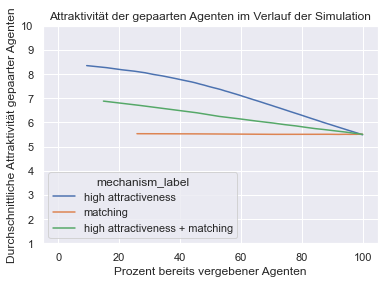

In [7]:
# Diagramm erstellen - Linien werden gruppiert nach "mechanism_label"
sns.lineplot(data=df, x="percent_coupled", y="average_attractiveness_of_couples", hue="mechanism_label")

# Diagramm beschriften
plt.title("Attraktivität der gepaarten Agenten im Verlauf der Simulation")
plt.xlabel("Prozent bereits vergebener Agenten")
plt.ylabel("Durchschnittliche Attraktivität gepaarter Agenten")

# Sichtbare Achsenbereiche einstellen
plt.xlim([-5, 105])
plt.ylim([1, 10])

plt.show()